# Perceptrons

These codes were provided in the unit Deep Learning of the [Machine Learning Engineer Nanodegree by Udacity](https://www.udacity.com/course/machine-learning-engineer-nanodegree--nd009) as a pedagogical introduction to neural networks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

## Logical operations

### Perceptron AND

In [2]:
# Set weight1, weight2, and bias
weight1 = 0.0001
weight2 = 0.001 
bias = - 0.00105

# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0              -0.00105                    0          Yes
      0          1              -0.00005                    0          Yes
      1          0              -0.00095                    0          Yes
      1          1               0.00005                    1          Yes


### Perceptron NOT

In [3]:
# Set weight1, weight2, and bias
weight1 = 0.0
weight2 = -0.15
bias = 0.1

# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                  0.10                    1          Yes
      0          1                 -0.05                    0          Yes
      1          0                  0.10                    1          Yes
      1          1                 -0.05                    0          Yes


## Perceptron algorithm

In [29]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return np.array(boundary_lines)

### Load CSV function

Adapted from [Python Tutorials](https://pythonspot.com/reading-csv-files-in-python/).

In [30]:
import csv
 
def readCSVFile(filename):
    X = []
    y = []
 
    with open(filename) as csvDataFile:
        csvReader = csv.reader(csvDataFile)
        for row in csvReader:
            y.append(row[-1])
            X.append(list(row[0:-1]))
            
        y = np.array(y, dtype=int)
        X = np.array(X, dtype=float)

    return X, y

In [31]:
X, y = readCSVFile('data/data.csv')

In [32]:
X[:10]

array([[ 0.78051 , -0.063669],
       [ 0.28774 ,  0.29139 ],
       [ 0.40714 ,  0.17878 ],
       [ 0.2923  ,  0.4217  ],
       [ 0.50922 ,  0.35256 ],
       [ 0.27785 ,  0.10802 ],
       [ 0.27527 ,  0.33223 ],
       [ 0.43999 ,  0.31245 ],
       [ 0.33557 ,  0.42984 ],
       [ 0.23448 ,  0.24986 ]])

In [42]:
y[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [80]:
lines = trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 50)

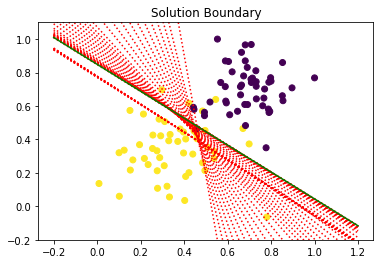

In [81]:
x_domain = np.linspace(-0.2, 1.2)

for j in range(len(lines)):
    plt.plot(x_domain, x_domain*lines[j, 0] + lines[j, 1], color= 'r', linestyle=':') 
    
plt.plot(x_domain, x_domain*lines[len(lines)-1, 0] + lines[len(lines)-1, 1], linestyle='-', color='g') 
plt.scatter(X[:, 0], X[:, 1], c = y)

plt.ylim(-0.2, 1.1)
plt.title('Solution Boundary')

plt.show()

## Logistic Regression Algorithm

In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))
def prediction(X, W, b):
    return sigmoid(np.matmul(X,W)+b)
def error_vector(y, y_hat):
    return [-y[i]*np.log(y_hat[i]) - (1-y[i])*np.log(1-y_hat[i]) for i in range(len(y))]
def error(y, y_hat):
    ev = error_vector(y, y_hat)
    return sum(ev)/len(ev)

# Code to calculate the gradient of the error function.
# The result should be a list of three lists:
# The first list should contain the gradient (partial derivatives) with respect to w1
# The second list should contain the gradient (partial derivatives) with respect to w2
# The third list should contain the gradient (partial derivatives) with respect to b
def dErrors(X, y, y_hat):
    DErrorsDx1 = [-X[i][0]*(y[i]-y_hat[i]) for i in range(len(y))]
    DErrorsDx2 = [-X[i][1]*(y[i]-y_hat[i]) for i in range(len(y))]
    DErrorsDb = [-(y[i]-y_hat[i]) for i in range(len(y))]
    return DErrorsDx1, DErrorsDx2, DErrorsDb

# Code to implement the gradient descent step.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b.
# It should calculate the prediction, the gradients, and use them to
# update the weights and bias W, b. Then return W and b.
# The error e will be calculated and returned for you, for plotting purposes.
def gradientDescentStep(X, y, W, b, learn_rate = 0.01):
    y_hat = prediction(X,W,b)
    errors = error_vector(y, y_hat)
    derivErrors = dErrors(X, y, y_hat)
    W[0] -= sum(derivErrors[0])*learn_rate
    W[1] -= sum(derivErrors[1])*learn_rate
    b -= sum(derivErrors[2])*learn_rate
    # This calculates the error
    e = error(y, y_hat)
    return W, b, e


# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainLR(X, y, learn_rate = 0.01, num_epochs = 100):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    # Initialize the weights randomly
    W = np.array(np.random.rand(2,1))*2 -1
    b = np.random.rand(1)[0]*2 - 1
    # These are the solution lines that get plotted below.
    boundary_lines = []
    errors = []
    for i in range(num_epochs):
        # In each epoch, we apply the gradient descent step.
        W, b, error = gradientDescentStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
        errors.append(error)
    return boundary_lines, errors

In [17]:
boundary_lines__errors = trainLR(X, y, learn_rate = 0.01, num_epochs = 100)

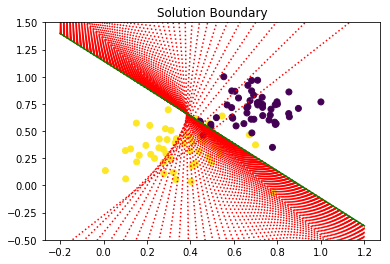

In [18]:
x_domain = np.linspace(-0.2, 1.2)
lines = np.array(boundary_lines__errors[0])

for j in range(len(lines)):
    plt.plot(x_domain, x_domain*lines[j, 0] + lines[j, 1], color= 'r', linestyle=':') 
    
plt.plot(x_domain, x_domain*lines[len(lines)-1, 0] + lines[len(lines)-1, 1], linestyle='-', color='g') 
plt.scatter(X[:, 0], X[:, 1], c = y)

plt.ylim(-0.5,1.5)
plt.title('Solution Boundary')

plt.show()

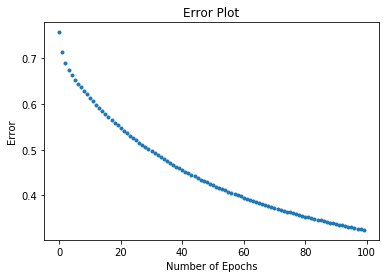

In [14]:
plt.plot(boundary_lines__errors[1], 'o', markersize ='3')
plt.ylabel('Error')
plt.xlabel('Number of Epochs')
plt.title('Error Plot')
plt.show()

## Softmax and Cross Entropy

In [15]:
def softmax(L):
    expL = np.exp(L)
    sumExpL = sum(expL)
    result = []
    for i in expL:
        result.append(i*1.0/sumExpL)
    return result  
    # Note: The function np.divide can also be used here, as follows:
    # def softmax(L):
    #     expL = np.exp(L)
    #     return np.divide (expL, expL.sum())

def cross_entropy(Y, P):
    Y = np.float_(Y)
    P = np.float_(P)
    return -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))

In [16]:
def prediction(X, W, b):
    return sigmoid(np.matmul(X,W)+b)